In [ ]:
pip install pandas openpyxl scikit-image matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install altair_viewer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill
from skimage import color
import numpy as np
import matplotlib.colors as mcolors
import altair as alt

In [ ]:


# Read the Excel file
df = pd.read_excel('/content/Lab_values.xlsx')

# Extract the Lab values
lab_values = df[['L', 'a', 'b']]
names = df['Name']

# Convert Lab values to aRGB hex format
def lab_to_hex(L, a, b):
    lab = np.array([[L, a, b]])
    rgb = color.lab2rgb(lab)[0]
    rgb_scaled = np.clip(rgb * 255, 0, 255).astype(int)
    hex_color = mcolors.rgb2hex(rgb_scaled / 255.0)
    return hex_color

# Create a new Excel workbook and select the active sheet
workbook = Workbook()
sheet = workbook.active

# Create a color swatch in Excel
for row, (lab, name) in enumerate(zip(lab_values.values, names), start=1):
    # Convert Lab to hex format
    hex_value = lab_to_hex(*lab)
    fill = PatternFill(start_color=hex_value[1:], end_color=hex_value[1:], fill_type='solid')
    sheet.cell(row=row, column=1).fill = fill
    sheet.cell(row=row, column=2).value = name
    # Set column widths
sheet.column_dimensions['A'].width = 10
sheet.column_dimensions['B'].width = 20

# Save the workbook to an Excel file
workbook.save('color_swatch.xlsx')

# Add a new column with the hex color values
df['Hex Color'] = df.apply(lambda row: lab_to_hex(row['L'], row['a'], row['b']), axis=1)

# Save the modified DataFrame to a new Excel file
df.to_excel('lab_values_with_hex.xlsx', index=False)


TypeError: ignored

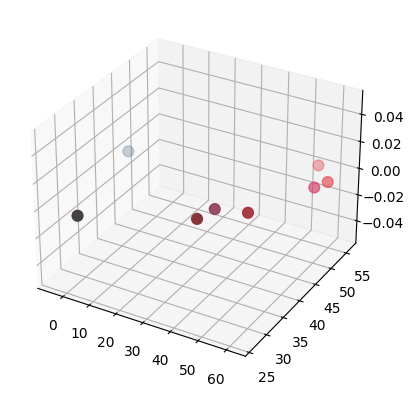

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D
ax.scatter(df['a'], df['L'], c=df['Hex Color'], s=60)

# Add labels to the points
for x, y, z, name in zip(df['a'], df['L'], df['Hex Color'], df['Name']):
    ax.text(x + 0.2, y + 0.2, z + 0.2, str(name), ha='left', va='center')

# Set labels for the axes
ax.set_xlabel('a')
ax.set_ylabel('L')
ax.set_zlabel('Hex Color')

# Display the 3D chart
plt.show()


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

# Create a trace for the scatter plot
trace = go.Scatter3d(
    x=df['a'],
    y=df['Hex Color'],
    z=df['L'],
    mode='markers',
    marker=dict(
        size=6,
        color=df['Hex Color'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=df['Name']
)

# Create the layout for the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis_title='a',
        yaxis_title='Hex Color',
        zaxis_title='L'
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

# Display the 3D plot
fig.show()


In [ ]:
import plotly.graph_objects as go

# Create a trace for the scatter plot
trace = go.Scatter3d(
    x=df['a'],
    y=df['L'],
    z=df['b'],
    mode='markers',
    marker=dict(
        size=6,
        color=df['Hex Color'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=df['Name']
)

# Create the layout for the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis_title='a',
        yaxis_title='L',
        zaxis_title='b'
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

# Display the 3D plot
fig.show()

# Export the graph as an HTML file
pio.write_html(fig, 'path_to_output_file.html')


In [ ]:
import plotly.io as pio

# Create your Plotly figure (e.g., fig) and layout (e.g., layout)
# ...

# Export the graph as an HTML file
pio.write_html(fig, 'path_to_output_file.html')


In [ ]:
import plotly.graph_objects as go

# Create a trace for the scatter plot
trace = go.Scatter3d(
    x=df['a'],
    y=df['L'],
    z=df['b'],
    mode='markers',
    marker=dict(
        size=6,
        color=df['Hex Color'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=df['Name'],  # Labels for the data points
    textposition='top center',  # Position of the labels
    hovertemplate='Name: %{text}'  # Format of the hover tooltip
)

# Create the layout for the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis_title='a',
        yaxis_title='L',
        zaxis_title='b'
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

# Display the 3D plot
fig.show()


Start experimenting with graphs

In [ ]:
# Create an interactive 2D graph in Altair with shade names
base = alt.Chart(df).encode(
    x='a',
    y='L',
    color=alt.Color('Hex Color', scale=None),
)

points = base.mark_circle(size=60).encode(
    tooltip=['Name', 'Hex Color']
)

text = base.mark_text(
    align='left',
    baseline='middle',
    dx=7  # Nudges text to right so it doesn't appear on top of the point
).encode(
    text='Name'
)

chart = (points + text).interactive()

chart  # Display the chart


alt.LayerChart(...)

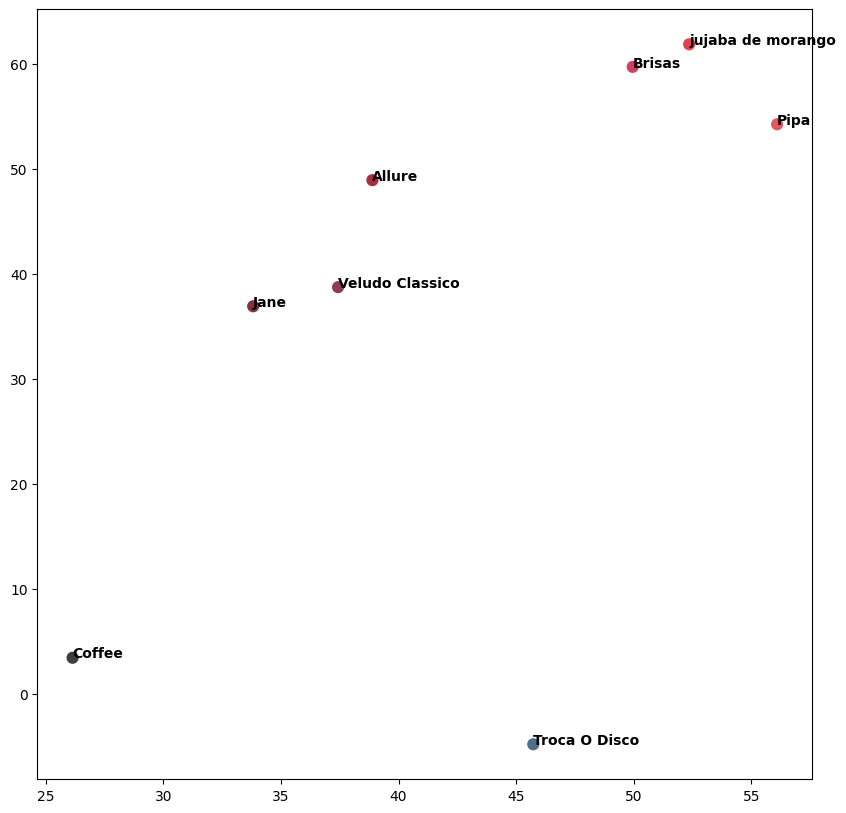

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 10))

# Use scatter function, 'L' for x-axis, 'a' for y-axis, and color points by 'Hex Color'
plt.scatter(df['L'], df['a'], c=df['Hex Color'], s=60)

# Loop through the DataFrame and add the shade names as text at the 'L' and 'a' coordinates
for i in range(df.shape[0]):
    plt.text(df['L'].iloc[i], df['a'].iloc[i], df['Name'].iloc[i],
             horizontalalignment='left',
             size='medium',
             color='black',
             weight='semibold')

# Show the plot
plt.show()


Yes, you can change the size of the data points in the scatter plot by adjusting the s parameter in the scatter function. This parameter controls the size of the markers. Here's how you can do it:

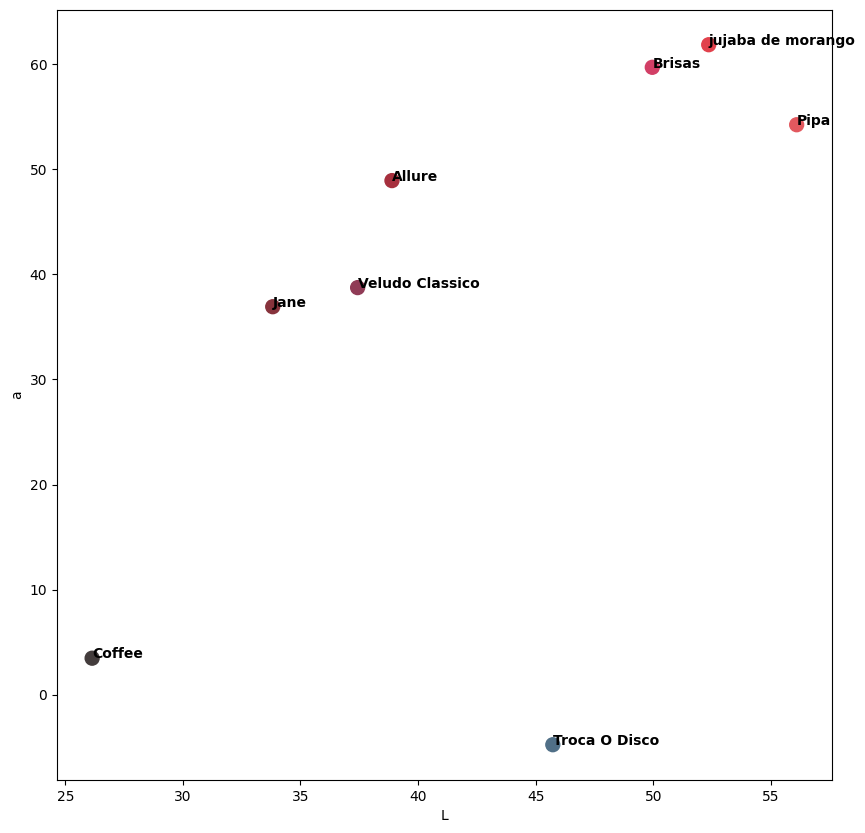

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 10))

# Use scatter function, 'L' for x-axis, 'a' for y-axis, and color points by 'Hex Color'
# Increase s from 60 to a larger number, like 100, to make the points larger
plt.scatter(df['L'], df['a'], c=df['Hex Color'], s=100)

# Loop through the DataFrame and add the shade names as text at the 'L' and 'a' coordinates
for i in range(df.shape[0]):
    plt.text(df['L'].iloc[i], df['a'].iloc[i], df['Name'].iloc[i],
             horizontalalignment='left',
             size='medium',
             color='black',
             weight='semibold')

# Label axes
plt.xlabel('L')
plt.ylabel('a')

# Show the plot
plt.show()


You can adjust the 's' parameter as needed to get the size of the data points you want.